In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Reading Data

In [147]:
df=pd.read_csv(r"C:\Users\yoges\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [148]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis And Data Cleaning

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None of the columns have null value.
Some columns type is misplaced. 'TotalCharges' should be float, placed as object.

In [150]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [151]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


This 11 values have tenure value zero and total charges null.\
Tenure value cannot be zero.\
As there are only 11 rows it willbe safe to drop this 11 rows.


In [152]:
df.dropna(inplace=True)

In [153]:
df['TotalCharges'].isnull().sum()

0

Cutomer Id is not neded for our analysis.

In [154]:
df.drop(columns='customerID',inplace=True)

In [155]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

As some  payment method have'(automatic)' in the denomination which we can eliminate.\
so it will become easy for further visualization

In [156]:
df['PaymentMethod']=df['PaymentMethod'].str.replace(' (automatic)','',regex=False)

In [157]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

## Data Visualization

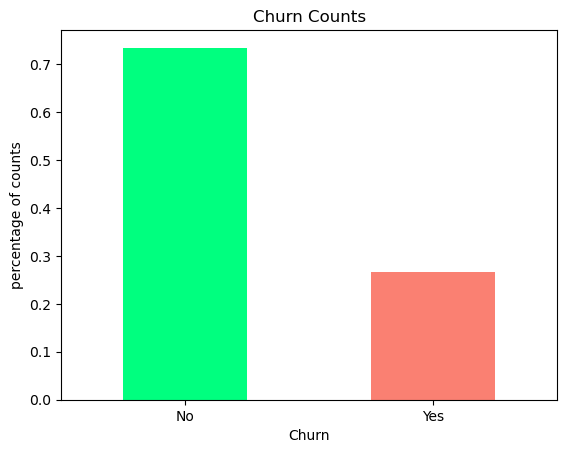

In [158]:
df['Churn'].value_counts(normalize=True).plot(kind='bar',color=('springgreen','salmon'))
plt.title('Churn Counts')
plt.xlabel('Churn')
plt.ylabel('percentage of counts')
plt.xticks(rotation= 0)
plt.show()

from the count plot we can observe that the data set is imbalance one.\
As 'NO' is approximately more than 70% and 'Yes' is too less as compared to 'No'.\
This Imbalance may result in increase of 'False Negative' Outcomes.

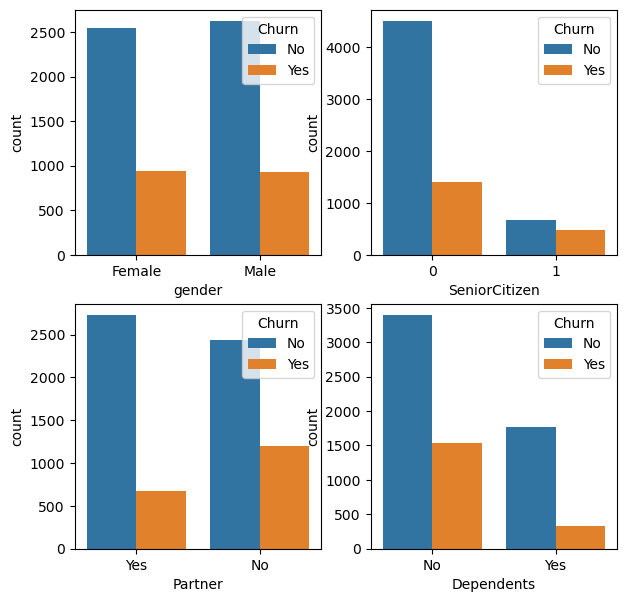

In [159]:
fig, ax =plt.subplots(2,2,figsize=(7,7))
sns.countplot(data=df,x='gender',hue='Churn', ax=ax[0,0])
sns.countplot(data=df,x='SeniorCitizen',hue='Churn', ax=ax[0,1])
sns.countplot(data=df,x='Partner',hue='Churn', ax=ax[1,0])
sns.countplot(data=df,x='Dependents',hue='Churn', ax=ax[1,1])
plt.show()

As the numbers are not in parcentage it is difficult to understand this graphs.\
we need a percentage stacked bar plot so we can compare above groups.

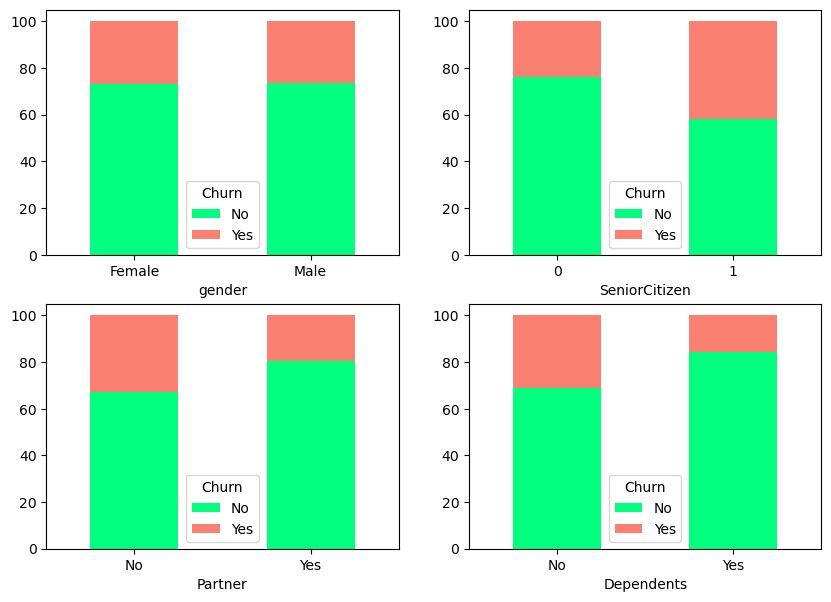

In [160]:
    column_name=['gender','SeniorCitizen','Partner','Dependents']
    fig,ax = plt.subplots(2,2,figsize=(10,7))
    for i,j in zip(column_name,ax.ravel()):
        df_plot=pd.crosstab(df[i],df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        df_plot.plot(kind='bar',stacked=True,rot=0,color=('springgreen','salmon'),ax=j)

Gender don't have any impact on churn rate.\
Churn rate senior citizens double than of others.\
Customers with partners have less churn rate.\
Dependents have less churn rate.

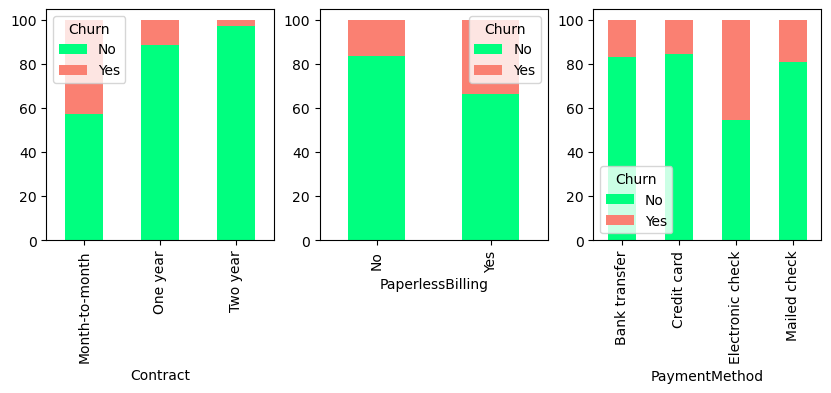

In [161]:
column_name = ['Contract', 'PaperlessBilling', 'PaymentMethod']
fig,ax = plt.subplots(1,3,figsize=(10,3))
for i,j in zip(column_name,ax.ravel()):
        df_plot=pd.crosstab(df[i],df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        df_plot.plot(kind='bar',stacked=True,color=('springgreen','salmon'),ax=j)

customer with month to month contract have high churn rate than of other types of contract.\
Customer with PaperlessBilling have high churn rate than customer with paperbilling.\
Electronic check payment method have high churn rate than other payment method.


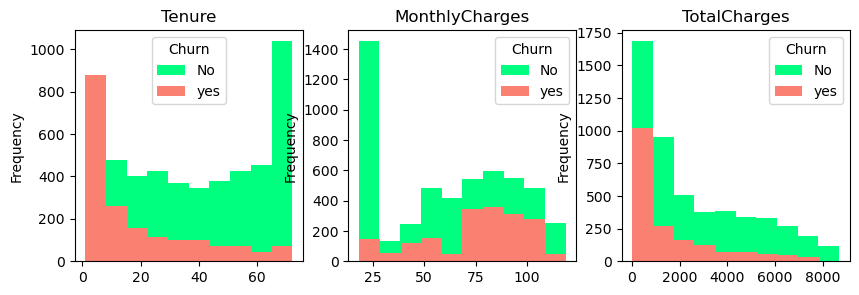

In [162]:
column_names = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig,ax = plt.subplots(1,3,figsize=(10,3))
for i,j in zip(column_names,ax.ravel()):
    df[df['Churn']=='No'][i].plot(kind='hist',stacked=True,color=('springgreen'),ax=j,label='No')
    df[df['Churn']=='Yes'][i].plot(kind='hist',stacked=True,color=('salmon'),ax=j,label='yes')
ax[0].set_title('Tenure')
ax[1].set_title('MonthlyCharges')
ax[2].set_title('TotalCharges')
ax[0].legend(title='Churn')
ax[1].legend(title='Churn')
ax[2].legend(title='Churn')

The churn rate tends to be larger when monthly charges are high.\
New customers (low tenure) are more likely to churn.\
Clients with high total charges are less likely to leave the company.

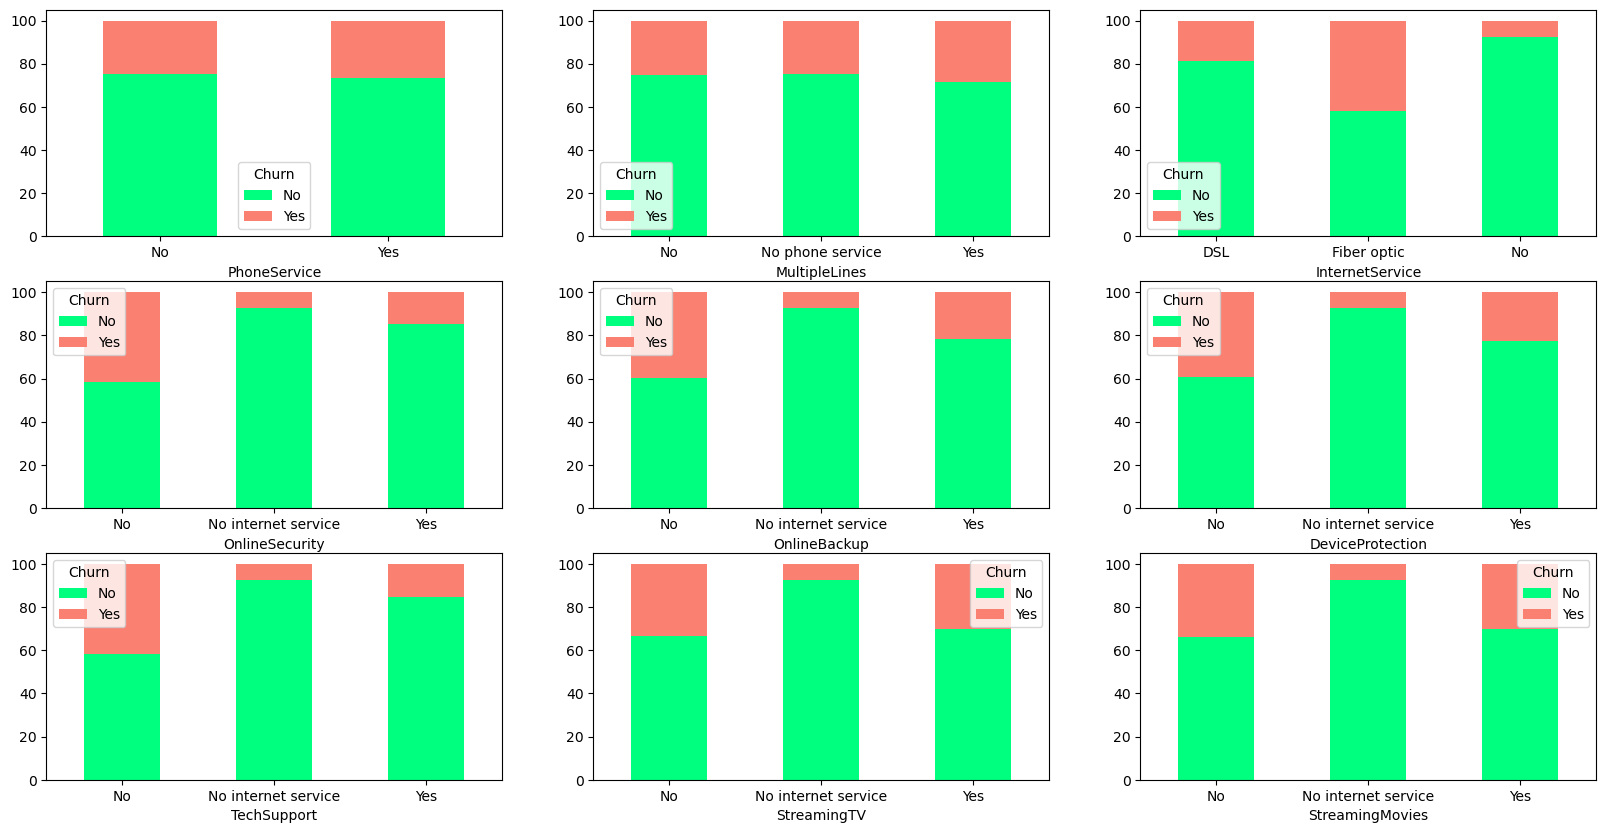

In [163]:
column_names= ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
fig,ax = plt.subplots(int(len(column_names)/3),3,figsize=(20,10))
for i,j in zip(column_names,ax.ravel()):
        df_plot=pd.crosstab(df[i],df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        df_plot.plot(kind='bar',stacked=True,color=('springgreen','salmon'),ax=j,rot=0)

We do not expect PhoneService and MultipleLines to have significant predictive power.The percentage of churn for all classes in both independent variables is nearly the same.\
Clients with online security churn less than those without it.\
Customers with no tech support tend to churn more often than those with tech support.\
Customers with no device protection churn more

## Feature importance

In [164]:
df_categorical=df.select_dtypes(include=object).drop('Churn',axis=1)
df_col=df_categorical.columns

In [165]:
mutual_info=[]
for i in range(15):
        info=mutual_info_score(df[df_col[i]],df['Churn'])
        mutual_info.append(info)
print(mutual_info)

[3.6504338027820715e-05, 0.011383147791626885, 0.014270326012253198, 6.914412223160693e-05, 0.0007983565971204365, 0.055393693585615335, 0.06452824152301159, 0.0466589944654092, 0.04378428627008563, 0.06287279751958623, 0.03180253675235035, 0.03191837098237602, 0.09818219921734034, 0.019119265234473853, 0.044422924978715875]


In [166]:
mutual_info=pd.DataFrame(mutual_info,columns=['info'],index=df_col)

In [167]:
mutual_info.sort_values(by='info',ascending=False,inplace=True)
mutual_info

,info
Contract,0.098182
OnlineSecurity,0.064528
TechSupport,0.062873
InternetService,0.055394
OnlineBackup,0.046659
PaymentMethod,0.044423
DeviceProtection,0.043784
StreamingMovies,0.031918
StreamingTV,0.031803
PaperlessBilling,0.019119


<Axes: >

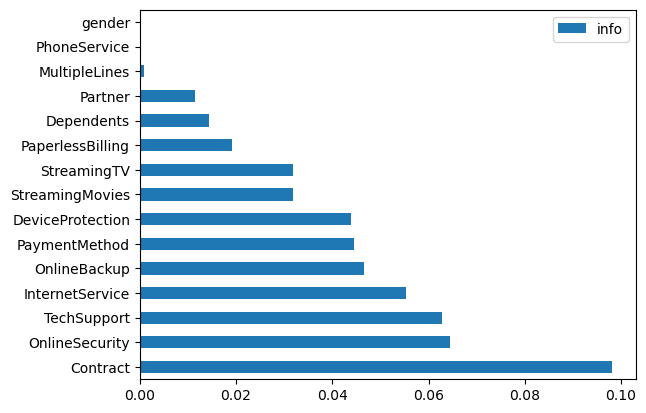

In [168]:
mutual_info.plot(kind='barh')

As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target\
This information is in line with the conclusions we have previously drawn by visualizing the data.\
In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

## Feature Engineering

In [169]:
X=pd.get_dummies(df.iloc[:,:19])
Y=df.iloc[:,-1]

In [172]:
X.shape

(7032, 45)

In [173]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=40)

In [174]:
models = []
models.append(('k_nearest_neighbors', KNeighborsClassifier()))
models.append(('logistic_regression', LogisticRegression()))
models.append(('support_vector_machines', SVC()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('random_forest', RandomForestClassifier()))
models.append(('gradient_boosting', GradientBoostingClassifier()))

In [175]:
result=[]
names=[]
for name, model in models:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    result.append(accuracy)
    names.append(name)
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: k_nearest_neighbors, Accuracy: 0.7565415244596132)
Classifier: logistic_regression, Accuracy: 0.7952218430034129)


C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: support_vector_machines, Accuracy: 0.745164960182025)
Classifier: DecisionTree, Accuracy: 0.7207053469852105)
Classifier: random_forest, Accuracy: 0.7593856655290102)
Classifier: gradient_boosting, Accuracy: 0.7963594994311718)


In [176]:
grid_parameters={'n_estimators': [80, 90, 100, 110, 115, 120],
                'max_depth': [3,4,5,6],
                'max_features': [None, 'auto', 'sqrt', 'log2'], 
                'min_samples_split': [2, 3, 4, 5]}
random_search=RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [80, 90, 100, 110, 115,
                                                         120]})

In [177]:
random_search.best_score_

0.8107668372348176

In [181]:
accuracy_score(Y_test,random_search.predict(X_test))

0.79806598407281

In [178]:
random_search.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 3}

In [179]:
random_search_predictions = random_search.predict(X_test)

confusion_matrix = confusion_matrix(Y_test, random_search_predictions)

confusion_matrix

array([[1155,  155],
       [ 200,  248]], dtype=int64)

In [180]:
print(classification_report(Y_test, random_search_predictions))

              precision    recall  f1-score   support

          No       0.85      0.88      0.87      1310
         Yes       0.62      0.55      0.58       448

    accuracy                           0.80      1758
   macro avg       0.73      0.72      0.72      1758
weighted avg       0.79      0.80      0.79      1758

